## Project 10 - Dry Bean

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.



### Table of Content

* Importing the Relevant Libraries
* Importing the Dataset
* Data Inspection
* Exploratory Data Analysis
* Making a Prediction
* Predicting the Error
* Comparison of the results of the models

#### Regular EDS and plotting Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#### Importing Dataset

In [2]:
pwd()

'C:\\Users\\Debjit\\Desktop\\Decodr Data Science Course\\Projects\\Project 10 - Dry Bean'

#### Loading the dataset

In [4]:
df = pd.read_csv('Dry_Bean_Dataset.csv')
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [9]:
# Counting the details of every column
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

#### Cleaning the data

In [8]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

#### Counting the details of the last column in our DataFrame

In [13]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [20]:
# Counting the values
df['Class'].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

C:\Users\Debjit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


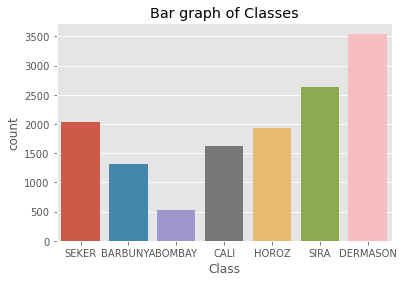

In [30]:
# A figure created to show the count of Classes
sns.countplot(df['Class'])
plt.title('Bar graph of Classes');

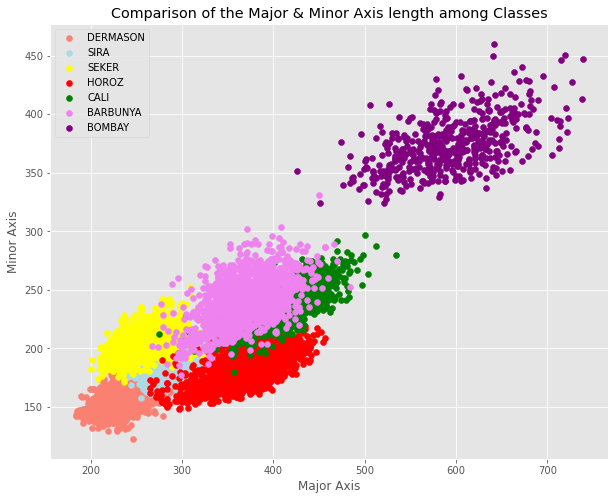

In [33]:
plt.figure(figsize=(10,8))

plt.scatter(df.MajorAxisLength[df.Class=='DERMASON'], 
            df.MinorAxisLength[df.Class=='DERMASON'], 
            c="salmon") 

plt.scatter(df.MajorAxisLength[df.Class=='SIRA'], 
            df.MinorAxisLength[df.Class=='SIRA'], 
            c="lightblue") 

plt.scatter(df.MajorAxisLength[df.Class=='SEKER'], 
            df.MinorAxisLength[df.Class=='SEKER'],
            c="yellow")

plt.scatter(df.MajorAxisLength[df.Class=='HOROZ'], 
            df.MinorAxisLength[df.Class=='HOROZ'],
            c="red") 

plt.scatter(df.MajorAxisLength[df.Class=='CALI'], 
            df.MinorAxisLength[df.Class=='CALI'],
            c="green") 

plt.scatter(df.MajorAxisLength[df.Class=='BARBUNYA'], 
            df.MinorAxisLength[df.Class=='BARBUNYA'],
            c="violet")

plt.scatter(df.MajorAxisLength[df.Class=='BOMBAY'], 
            df.MinorAxisLength[df.Class=='BOMBAY'],
            c="purple")

plt.title("Comparison of the Major & Minor Axis length among Classes")
plt.xlabel("Major Axis")
plt.ylabel("Minor Axis");
plt.legend(["DERMASON", "SIRA","SEKER","HOROZ","CALI","BARBUNYA","BOMBAY"]);

#### Correlation between independent variables

In [35]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


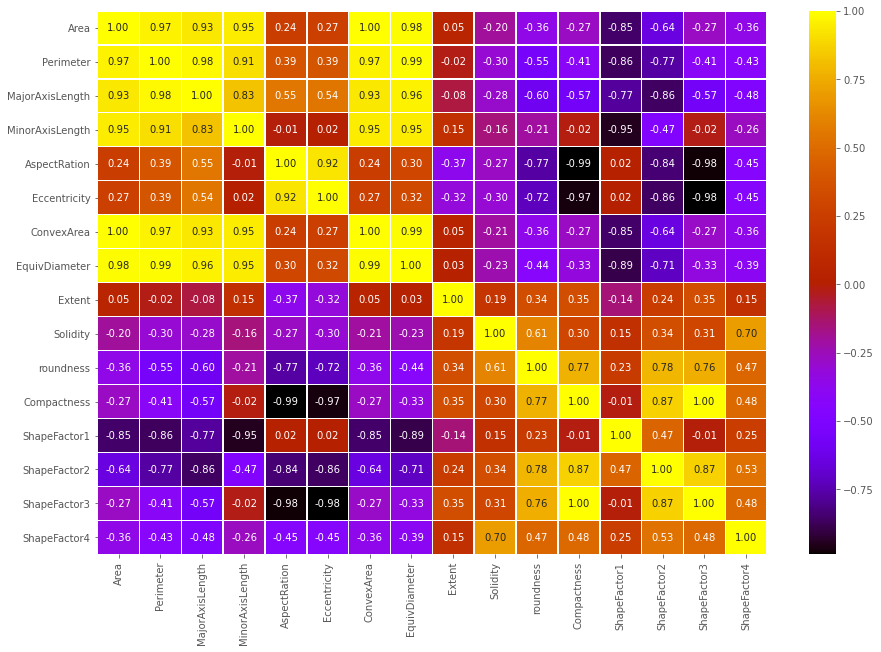

In [38]:
# Another figure with a little better look

corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
           annot=True,
           linewidth=0.5,
           fmt=".2f",
           cmap="gnuplot");

#### Now we will prepare the data for fitting the model

In [39]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [40]:
df.reset_index(inplace=True)

In [79]:
# Everything except target variable
X = df.drop("Class", axis=1)

# Target variable
y = df["Class"]

In [80]:
# Independent variables (no Class column)
X.head()

,index,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166


In [81]:
X.drop('index', axis=1, inplace=True)

In [82]:
# Class column
y

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object

#### Splitting the data into Train & Test

In [83]:
# Random seed for reproducibility
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2) 

In [84]:
X_train

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
11073,29076,636.353,235.061517,158.033619,1.487415,0.740272,29490,192.407674,0.693524,0.985961,0.902295,0.818542,0.008084,0.002239,0.670011,0.996584
13172,38091,755.186,271.077683,179.756984,1.508023,0.748513,38716,220.224811,0.706318,0.983857,0.839314,0.812405,0.007117,0.001912,0.660002,0.995298
11587,30969,651.527,230.164083,171.903953,1.338911,0.664964,31318,198.572293,0.733689,0.988856,0.916795,0.862742,0.007432,0.002540,0.744324,0.996584
12492,34589,685.425,253.001232,174.609358,1.448956,0.723664,34965,209.857291,0.784331,0.989246,0.925184,0.829471,0.007314,0.002136,0.688023,0.996915
430,35954,710.093,251.660769,182.014822,1.382639,0.690581,36380,213.958067,0.794564,0.988290,0.896038,0.850184,0.007000,0.002256,0.722814,0.999390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5191,83266,1117.778,448.473710,237.747098,1.886348,0.847920,84030,325.603384,0.797239,0.990908,0.837465,0.726026,0.005386,0.000923,0.527113,0.994319
13418,39857,755.392,283.623668,179.430885,1.580685,0.774448,40330,225.272077,0.692154,0.988272,0.877748,0.794264,0.007116,0.001747,0.630855,0.997183
5390,90004,1156.599,456.836383,252.353553,1.810303,0.833583,90790,338.521273,0.783939,0.991343,0.845485,0.741012,0.005076,0.000944,0.549099,0.994035
860,38426,711.412,246.696608,198.555756,1.242455,0.593467,38799,221.191100,0.752094,0.990386,0.954097,0.896612,0.006420,0.002559,0.803913,0.998826


In [85]:
X_test

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
1488,42339,741.226,260.199330,207.306394,1.255144,0.604347,42676,232.180294,0.771202,0.992103,0.968387,0.892317,0.006146,0.002403,0.796230,0.999383
2611,68247,1088.754,370.368146,237.863792,1.557060,0.766507,70172,294.779204,0.767683,0.972567,0.723492,0.795909,0.005427,0.001343,0.633471,0.986352
749,37856,708.716,248.430330,194.360324,1.278195,0.622835,38232,219.544429,0.744640,0.990165,0.947109,0.883726,0.006563,0.002469,0.780972,0.998235
99,33143,648.385,222.526309,189.737379,1.172812,0.522480,33377,205.423899,0.769980,0.992989,0.990685,0.923144,0.006714,0.003008,0.852195,0.999465
11298,29925,647.570,237.714031,161.004849,1.476440,0.735703,30321,195.196551,0.785309,0.986940,0.896748,0.821140,0.007944,0.002228,0.674271,0.995521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2884,73100,1079.089,380.360015,245.418405,1.549843,0.763991,74217,305.080007,0.794669,0.984950,0.788883,0.802082,0.005203,0.001328,0.643336,0.997070
532,36566,694.803,245.209088,190.102923,1.289875,0.631632,36883,215.771354,0.778596,0.991405,0.951840,0.879948,0.006706,0.002480,0.774309,0.998762
10926,28412,623.016,227.308988,159.472066,1.425384,0.712605,28735,190.198007,0.809505,0.988759,0.919842,0.836738,0.008000,0.002419,0.700130,0.997954
4676,74684,1046.993,398.943901,240.106668,1.661528,0.798605,75767,308.367674,0.802553,0.985706,0.856150,0.772960,0.005342,0.001176,0.597467,0.992708


In [86]:
y_train

11073    DERMASON
13172    DERMASON
11587    DERMASON
12492    DERMASON
430         SEKER
           ...   
5191         CALI
13418    DERMASON
5390         CALI
860         SEKER
7270        HOROZ
Name: Class, Length: 10888, dtype: object

In [87]:
y_test

1488        SEKER
2611     BARBUNYA
749         SEKER
99          SEKER
11298    DERMASON
           ...   
2884     BARBUNYA
532         SEKER
10926    DERMASON
4676         CALI
7760         SIRA
Name: Class, Length: 2723, dtype: object

#### Model choices

1. Random Forest Classifier
2. Gradient Boosting Classifier
3. XG Boosting Classifier
4. AdaBoost Classifier

### Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier as RFC

In [89]:
#create a model
RF_model = RFC(n_estimators= 250,max_depth= 1)

#model fitting
RF_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=1, n_estimators=250)

In [90]:
#prediction 
RF_predicted_y_test = RF_model.predict(X_test)

#actual
RF_actual_y_test = y_test

In [91]:
RF_predicted_y_test

array(['DERMASON', 'SIRA', 'DERMASON', ..., 'DERMASON', 'SIRA',
       'DERMASON'], dtype=object)

In [92]:
RF_actual_y_test

1488        SEKER
2611     BARBUNYA
749         SEKER
99          SEKER
11298    DERMASON
           ...   
2884     BARBUNYA
532         SEKER
10926    DERMASON
4676         CALI
7760         SIRA
Name: Class, Length: 2723, dtype: object

### Gradient Boosting Classifier

In [56]:
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
#create a model
GB_model = GradientBoostingClassifier()

#model fitting
GB_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [59]:
#prediction 
GB_predicted_y_test = GB_model.predict(X_test)

#actual
GB_actual_y_test = y_test

In [60]:
GB_predicted_y_test

array(['SEKER', 'BARBUNYA', 'SEKER', ..., 'DERMASON', 'CALI', 'DERMASON'],
      dtype=object)

In [61]:
GB_actual_y_test

1488        SEKER
2611     BARBUNYA
749         SEKER
99          SEKER
11298    DERMASON
           ...   
2884     BARBUNYA
532         SEKER
10926    DERMASON
4676         CALI
7760         SIRA
Name: Class, Length: 2723, dtype: object

### XG Boosting Classifier

In [62]:
from xgboost import XGBClassifier

In [64]:
#create a model
XG_model = XGBClassifier()

#model fitting
XG_model.fit(X_train,y_train)

C:\Users\Debjit\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:57:25] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
#prediction 
XG_predicted_y_test = XG_model.predict(X_test)

#actual
XG_actual_y_test = y_test

In [66]:
XG_predicted_y_test

array(['SEKER', 'BARBUNYA', 'SEKER', ..., 'DERMASON', 'CALI', 'DERMASON'],
      dtype=object)

In [101]:
XG_actual_y_test

1488        SEKER
2611     BARBUNYA
749         SEKER
99          SEKER
11298    DERMASON
           ...   
2884     BARBUNYA
532         SEKER
10926    DERMASON
4676         CALI
7760         SIRA
Name: Class, Length: 2723, dtype: object

### AdaBoost Classifier

In [94]:
from sklearn.ensemble import AdaBoostClassifier as ABC

In [95]:
#create a model
AB_model = ABC()

#model fitting
AB_model.fit(X_train, y_train)

AdaBoostClassifier()

In [96]:
#Prediction
AB_predicted_y_test = AB_model.predict(X_test)

#actual
AB_actual_y_test = y_test

In [97]:
AB_predicted_y_test

array(['SEKER', 'CALI', 'DERMASON', ..., 'DERMASON', 'CALI', 'DERMASON'],
      dtype=object)

In [100]:
AB_actual_y_test

1488        SEKER
2611     BARBUNYA
749         SEKER
99          SEKER
11298    DERMASON
           ...   
2884     BARBUNYA
532         SEKER
10926    DERMASON
4676         CALI
7760         SIRA
Name: Class, Length: 2723, dtype: object

### Model Comparison

In [102]:
print ( 'Random Forest Classifier:',RF_model.score(X_train,y_train),
        'Gradient Boosting Classifier:',GB_model.score(X_train,y_train),
        'XG Boosting Classifier:',XG_model.score(X_train,y_train),
        'AdaBoost Classifier:',AB_model.score(X_train,y_train),sep="\n")

Random Forest Classifier:
0.41789125642909625
Gradient Boosting Classifier:
0.9614254224834681
XG Boosting Classifier:
1.0
AdaBoost Classifier:
0.6486039676708303


<Figure size 1440x1296 with 0 Axes>

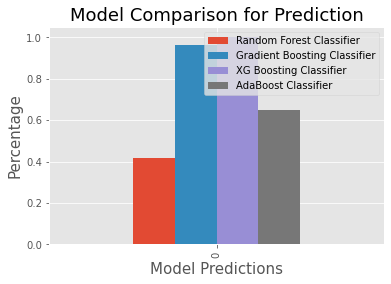

In [105]:
A = (RF_model.score(X_train,y_train),GB_model.score(X_train, y_train),XG_model.score(X_train,y_train),AB_model.score(X_train,y_train))

model_scores =(A)
model_compare = pd.DataFrame(model_scores)
plt.figure(figsize=(20, 18))
model_compare.T.plot.bar();
plt.xlabel("Model Predictions", size=15)
plt.ylabel("Percentage", size=15)
plt.title("Model Comparison for Prediction", size=18)
plt.legend(["Random Forest Classifier ","Gradient Boosting Classifier","XG Boosting Classifier","AdaBoost Classifier"]);